In [2]:
import numpy as np

In [18]:
def overlapping_intervals(arr1, arr2):
    """
    Find overlapping segments between two lists of segments from different
    detectors.

    Designed to be used with the outputs of get_seg_list as the inputs.

    Keyword arguments:
    arr1 -- segment list of first detector
    arr1 -- segment list of second detector
    """
    res = []
    arr1_pos = 0
    arr2_pos = 0
    len_arr1 = len(arr1)
    len_arr2 = len(arr2)
    # //Iterate over all intervals and store answer
    while arr1_pos < len_arr1 and arr2_pos < len_arr2:
        arr1_seg = arr1[arr1_pos]
        arr2_seg = arr2[arr2_pos]

        # print(arr1_seg)
        # print(arr2_seg)

        # arr1_seg fully inside of arr2_seg
        if arr1_seg[0] >= arr2_seg[0] and arr1_seg[1] <= arr2_seg[1]:
            res.append(arr1_seg)
            arr1_pos += 1

        # arr2_seg fully inside of arr1_seg
        elif arr2_seg[0] >= arr1_seg[0] and arr2_seg[1] <= arr1_seg[1]:
            res.append(arr2_seg)
            arr2_pos += 1

        # arr1_seg fully below arr2_seg
        elif arr1_seg[0] <= arr2_seg[0] and arr1_seg[1] <= arr2_seg[0]:
            arr1_pos += 1

        # arr2_seg fully below arr1_seg
        elif arr2_seg[0] <= arr1_seg[0] and arr2_seg[1] <= arr1_seg[0]:
            arr2_pos += 1

        # arr1_seg overlaps start of arr2_seg
        elif arr1_seg[0] <= arr2_seg[0] <= arr1_seg[1] <= arr2_seg[1]:
            res.append([arr2_seg[0], arr1_seg[1]])
            arr1_pos += 1

        # arr2_seg overlaps start of arr1_seg
        elif arr2_seg[0] <= arr1_seg[0] <= arr2_seg[1] <= arr1_seg[1]:
            res.append([arr1_seg[0], arr2_seg[1]])
            arr2_pos += 1

    if not res:
        return [[]]

    return res


def get_seg_list(file_name, macrostart, macroend):
    """
    Get a list of segments from a single detector segment file bounded
    by a GPS time window

    Keyword arguments:
    file_name -- path to detector's segment list
    macrostart -- Start GPS time of overlap window
    macroend -- End GPS time of overlap window
    """
    file = open(file_name, "r")

    good_segs = []

    for i in file.readlines():
        times = i.split(" ")
        if int(times[1]) < macrostart or int(times[0]) > macroend:
            continue
        else:
            good_segs.append([int(times[0]), int(times[1])])

    file.close()

    #if the first segment starts before macrostart, set the start time to macrostart
    #if the last segment ends after macroend, set the end time to macroend

    if good_segs[0][0] < int(macrostart):
        good_segs[0][0] = int(macrostart)
    if good_segs[-1][1] > int(macroend):
        good_segs[-1][1] = int(macroend)


    #good_segs[0][0] = int(macrostart)
    #good_segs[-1][1] = int(macroend)

    return good_segs


def combine_seg_list(file_h1, file_l1, macrostart, macroend, min_duration):
    """
    Find overlapping segments between two detectors within a window
    defined by two GPS times.

    Keyword arguments:
    file_h1 -- path to H1 complete segment list
    file_l1 -- path to L1 complete segment list
    macrostart -- Start GPS time of overlap window
    macroend -- End GPS time of overlap window
    """
    good_segs_h1 = get_seg_list(file_h1, macrostart, macroend)
    good_segs_l1 = get_seg_list(file_l1, macrostart, macroend)

    good_segs = overlapping_intervals(good_segs_h1, good_segs_l1)

    #remove segments shorter than min_duration
    good_segs = [x for x in good_segs if x[1] - x[0] > min_duration]

    return good_segs, good_segs_h1, good_segs_l1

In [3]:


import matplotlib.pyplot as plt

def plotting(segs, height):
    y = []
    for key, val in enumerate(segs):
        length = val[1] - val[0]
        for i in range(length):
            y.append(height)

        if key != len(segs)-1:
            length = segs[key+1][0] - val[1]
            for i in range(length):
                y.append(0)
    return y

In [ ]:

#Damon's
1238166018
1238220000

#my test case 

1239554063,1239555563

#proper usage:
1239150592, 1239150592 + 5e5


In [19]:
segs, h1, l1 = combine_seg_list('noise/segments/H1_O3a.txt', 'noise/segments/L1_O3a.txt',1239553063+1500,1239553063+3500, min_duration=1000)
print(segs)
#print(h1)
#print(l1)

for i in segs:
    print(i[1]-i[0])

[[1239554617, 1239556563]]
1946


1946
1946
2000


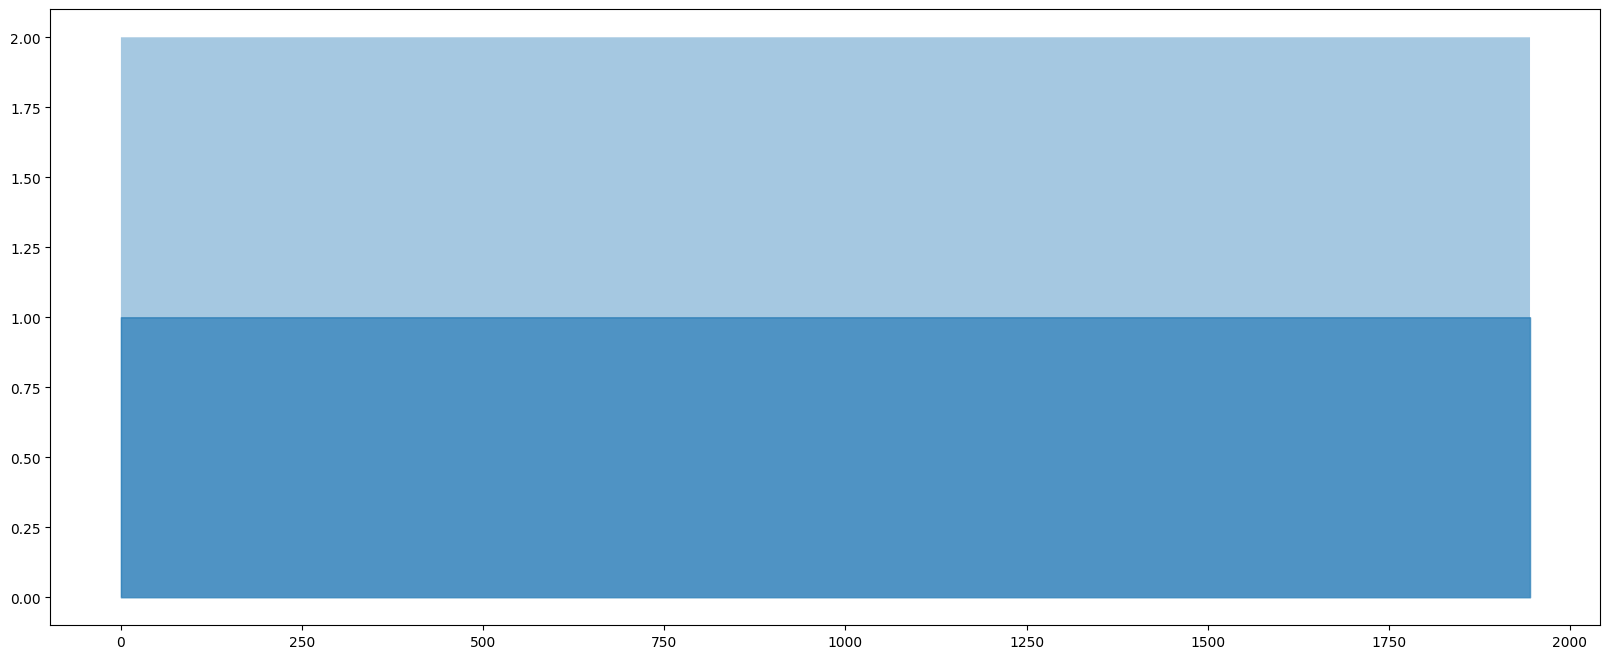

In [20]:
combined_plot = plotting(segs, 2)
h1_plot = plotting(h1, 1)
l1_plot = plotting(l1, 1)

print(len(combined_plot))
print(len(h1_plot))
print(len(l1_plot))

plt.figure(figsize=(20,8))
# plt.plot(combined_plot)
plt.fill_between(x=range(len(combined_plot)), y1=combined_plot, alpha=0.4)
plt.fill_between(x=range(len(h1_plot)), y1=h1_plot, alpha=0.4, color='tab:blue')
plt.fill_between(x=range(len(h1_plot)), y1=l1_plot[:len(h1_plot)], alpha=0.4, color='tab:blue')